In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# roc curve

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową.

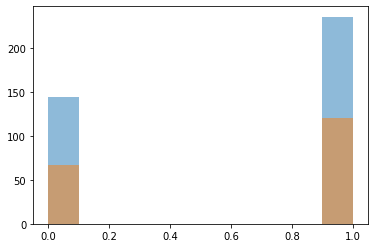

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Zad.
Naucz 

* SVC()
* SVC(C=1, gamma=0.00001)
* LogisticRegression(C=1)

Dla wszystkich modleli wylicz:

* precision    
* recall  
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc


svc

R^2: 0.9375
recall_score: 0.9917355371900827
f1_score: 0.963855421686747
accuracy_score: 0.9521276595744681
roc_score: 0.936166276057728

svc_params

R^2: 0.9448818897637795
recall_score: 0.9917355371900827
f1_score: 0.9677419354838711
accuracy_score: 0.9574468085106383
roc_score: 0.9436289626248922

lr

R^2: 0.9752066115702479
recall_score: 0.9752066115702479
f1_score: 0.9752066115702479
accuracy_score: 0.9680851063829787
roc_score: 0.9652152460836314


c:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


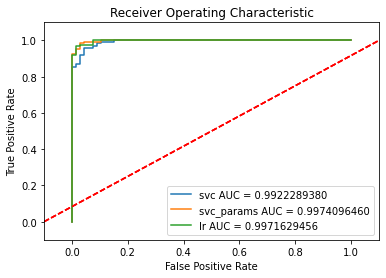

In [6]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import  metrics
from sklearn.metrics import roc_auc_score
 
models = dict()
clf1 = SVC(probability=True)
models['svc'] = clf1
clf2 = SVC(C=1, gamma=0.00001, probability=True)
models['svc_params'] = clf2
clf3 = LogisticRegression(C=1)
models['lr'] = clf3
 
for _, model in models.items():
    model.fit(X_train, y_train)
   
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models.items():
    print( '\n' + name + '\n')
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_score: {}".format( roc_auc_score(y_test, model.predict(X_test))))
   
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
 
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([-0.1, 1.1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()